<a href="https://colab.research.google.com/github/sillsphelyx/Survey_Data_Analysis-Quantivative/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
#Insert the directoryimport sys
import sys
sys.path.insert(0,'/content/drive/MyDrive/Danny Analysis')

In [6]:
# prompt: import.xlsx file

import pandas as pd

# Assuming your Excel file is in the specified directory
file_path = '/content/drive/MyDrive/Danny Analysis/DM_RESOURCE_CON_WP_New_for_cleaning.xlsx'  # Replace 'your_file.xlsx' with the actual filename

try:
  df = pd.read_excel(file_path)
  #print(df.head()) # Display the first few rows to verify import
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")


In [7]:
df.head()

,start,end,Welcome,1. What is your name?,2. Gender,3. Marital Status,4. Education,5. How old are you?,6. Where is your current community located?,6.1. VAG's in Liuwa,...,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,__version__,_tags,_index
0,2024-11-11 13:58:11.577,2024-11-11 14:43:52.616,NaN,Margaret Mbewe,Female,Married,Secondary,31.0,Liuwa (Liuwa Plain National Park),Lumei,...,406615000,97235a42-078a-4393-b99b-d99a8882ebd2,2024-11-11 12:44:09,NaN,NaN,submitted_via_web,NaN,vcdjum9hAcLNj846aTGhBF,NaN,1
1,2024-11-11 17:43:15.610,2024-11-11 18:22:24.451,NaN,Sinjala Siambango,Male,Married,Primary,38.0,Liuwa (Liuwa Plain National Park),Lumei,...,406722713,4607e91e-397d-40d1-b923-c96b94368cb1,2024-11-11 16:28:34,NaN,NaN,submitted_via_web,NaN,vcdjum9hAcLNj846aTGhBF,NaN,2
2,2024-11-11 13:28:50.388,2024-11-11 21:20:27.041,NaN,Mwangala Mubiana,Female,Single,Primary,28.0,Liuwa (Liuwa Plain National Park),Lumei,...,406800048,d1616192-f1b4-434a-bd24-d39f6d11b3a2,2024-11-11 19:24:06,NaN,NaN,submitted_via_web,NaN,vcdjum9hAcLNj846aTGhBF,NaN,3
3,2024-11-11 17:16:51.091,2024-11-11 19:02:03.752,NaN,Kacana ngubu,Male,Married,Primary,46.0,Liuwa (Liuwa Plain National Park),Lumei,...,406800055,c033a5fe-e96e-4a5b-927d-7f71736acf82,2024-11-11 19:24:07,NaN,NaN,submitted_via_web,NaN,vcdjum9hAcLNj846aTGhBF,NaN,4
4,2024-11-11 14:50:02.857,2024-11-11 21:11:45.641,NaN,Siyoto likubese,Female,Married,Primary,50.0,Liuwa (Liuwa Plain National Park),Lumei,...,406800075,d5f4bb43-f4e0-46f0-be41-6764fe9edfb3,2024-11-11 19:24:13,NaN,NaN,submitted_via_web,NaN,vcdjum9hAcLNj846aTGhBF,NaN,5


In [8]:
# prompt: Drop columns with all Nan values

df.dropna(axis=1, how='all', inplace=True)
#df.head()

In [9]:
len(df.columns)

476

In [17]:
df.columns[:15]

Index(['start', 'end', '1. What is your name?', '2. Gender ',
       '3. Marital Status ', '4. Education ', '5. How old are you? ',
       '6. Where is your current community located?', '6.1. VAG's in Liuwa ',
       '6.2 VAG's in Simalaha ', '7. Village ', '8. Chief ',
       '9. Household Size ', '10. Geographic Coordinates ',
       '_10. Geographic Coordinates _latitude'],
      dtype='object')

## Data Assessments for cleanness before proceeding with analysis

In [10]:
#import pandas as pd
def print_unique_names(dataframe, column_name):
    """
    Prints unique names from a specific column of a pandas DataFrame.

    Parameters:
    dataframe (pd.DataFrame): The pandas DataFrame containing the data.
    column_name (str): The name of the column to extract unique names from.

    Returns:
    None
    """
    try:
        if column_name not in dataframe.columns:
            print(f"Column '{column_name}' does not exist in the DataFrame.")
            return

        unique_names = dataframe[column_name].dropna().unique()
        print("Unique names:")
        for name in unique_names:
            print(name)
    except Exception as e:
        print(f"An error occurred: {e}")


In [19]:
col_name = "7. Village "
print_unique_names(df, col_name)

Unique names:
Tungambwa
Simbondwe
Ibolokwa
Ibolokwa 
Makaka
Kanjambanjamba
Makaka 
Mulyata
Mulyata 
Chimbinga
Climbinga
Ngoma
Kazauli
Mulinga
Chimbinga 
Kazauli 
Muyahulula
Silolo
Muyahulula 
Chilila
Nalongo
Mukelekete
Kanyika
Muyeyi
Siliya
Lufuba
Njekela
Sishekano
Kandiyana
Mukelekete 
Musongo
Kanjende
Kanjende 
Kambeu
Musombo
Nolongo
Lisiye
Chikaku
Kanyika 
Liteye 
Mutembo 
Kafula
Samvu
Samvu 
Lukoko
Sabuu
Kafula 
Suumbo
Silayi
Lyamangwa
Katoyana
Mandndi
Lwamangwa
Lyamangwa 
Mukunduko
Lukundo
Liuwa
Mandindi
Liamangwa
Madindi
Simaumbula 
Simaumbula
Nakatoya
Katayona
Makanga
Kasaya
Kasaya 
Limba
Siboleka
Kabeti
Kabeti 
Mukumbi
Lutunda
Nyambwa
Limba 
Makanga 
Namangu
Mukumba
Kabele
Lwaneka
Nahende
Simbotwe
Simbundu
Namangu 
Sikachenga
Singongi
Mabumbu
Mukumba 
Namango
Namuku
Mulonda
Simbwae
Lwambo
Njaki
Lwanda
Namia
Mukumbwa
Kuba singongi
Simanga 
Nchindo
Imalenda
Imalenda 
Kweteka
Kakulwani
Kakulwani 
Namukokosi
Lisulo
Simungo
Mwange
Samayoko
Maunga
Nalui
Mbayene
Namanjanga
Lwandi
Mapi

In [20]:
def clean_column_spacing(dataframe, column_name):
    """
    Cleans data entries in a specified column by removing extra spaces.

    Parameters:
    dataframe (pd.DataFrame): The pandas DataFrame containing the data.
    column_name (str): The name of the column to clean.

    Returns:
    pd.DataFrame: The DataFrame with cleaned column data.
    """
    try:
        if column_name not in dataframe.columns:
            print(f"Column '{column_name}' does not exist in the DataFrame.")
            return dataframe

        # Strip leading/trailing spaces and remove extra spaces within strings
        dataframe[column_name] = dataframe[column_name].astype(str).str.strip().str.replace(r'\s+', ' ', regex=True)
        print(f"Cleaned column '{column_name}' successfully.")
        return dataframe
    except Exception as e:
        print(f"An error occurred: {e}")
        return dataframe


In [ ]:
## Cleaning Vilange names so as to remove extra spacing and ensure repeated names in unique names are considered same
df = clean_column_spacing(dataframe, column_name)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_barchart(df, column, title=None, xlabel=None, ylabel='Count', figsize=(10, 6), color='skyblue'):
    """
    Plots a bar chart for a categorical column from a Pandas DataFrame.

    Parameters:
    - df: pandas.DataFrame
        The DataFrame containing the data.
    - column: str
        The name of the categorical column to plot.
    - title: str, optional
        The title of the plot. Defaults to None.
    - xlabel: str, optional
        The label for the x-axis. Defaults to the column name.
    - ylabel: str, optional
        The label for the y-axis. Defaults to 'Count'.
    - figsize: tuple, optional
        The size of the figure. Defaults to (10, 6).
    - color: str, optional
        The color of the bars. Defaults to 'skyblue'.

    Returns:
    - None
    """
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in the DataFrame.")

    # Count the occurrences of each category
    category_counts = df[column].value_counts()

    # Create the bar chart
    plt.figure(figsize=figsize)
    sns.barplot(x=category_counts.index, y=category_counts.values, color=color)

    # Add labels and title
    plt.title(title if title else f"Distribution of {column}", fontsize=16)
    plt.xlabel(xlabel if xlabel else column, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)

    # Show the plot
    plt.tight_layout()
    save_path = f'/content/drive/MyDrive/Danny Analysis/Results/{column}_barchart.png'
    plt.savefig(save_path)
    plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 91 columns):
 #   Column                                                                                                                                                                              Non-Null Count  Dtype         
---  ------                                                                                                                                                                              --------------  -----         
 0   start                                                                                                                                                                               310 non-null    datetime64[ns]
 1   end                                                                                                                                                                                 310 non-null    datetime64[ns]
 2   1. What is your name?     

In [ ]:
# prompt: select column names that are of type object

object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['1. What is your name?', 'Gender ', 'Marital Status ',
       'Education  Level', 'Community Location', 'VAG's in Liuwa ', 'Village ',
       'Your Chief ', '10. Geographic Coordinates ',
       'Position in traditional leadership',
       '13. What is your main Occupation and the primary source of income in your household? ',
       '13.1. Specify Others ',
       '1. How important are the Fisheries to the livelihoods of the Local Community?',
       '2. Can you describe the types of Fish Species that are most valued in the local community?',
       '3. Are there any specific Fishing Practices that are crucial for sustaining Fish populations by the Local communities? ',
       '4. How do you perceive the importance of Wildlife (e.g. Mammals, Birds, and Reptiles, etc.)?',
       '5. Which Wildlife Species do you consider to be the Most Valuable for the Community?',
       '6. Are there any cultural beliefs associated with certain Wildlife species?',
       '7. What roles do Fore

In [ ]:
df

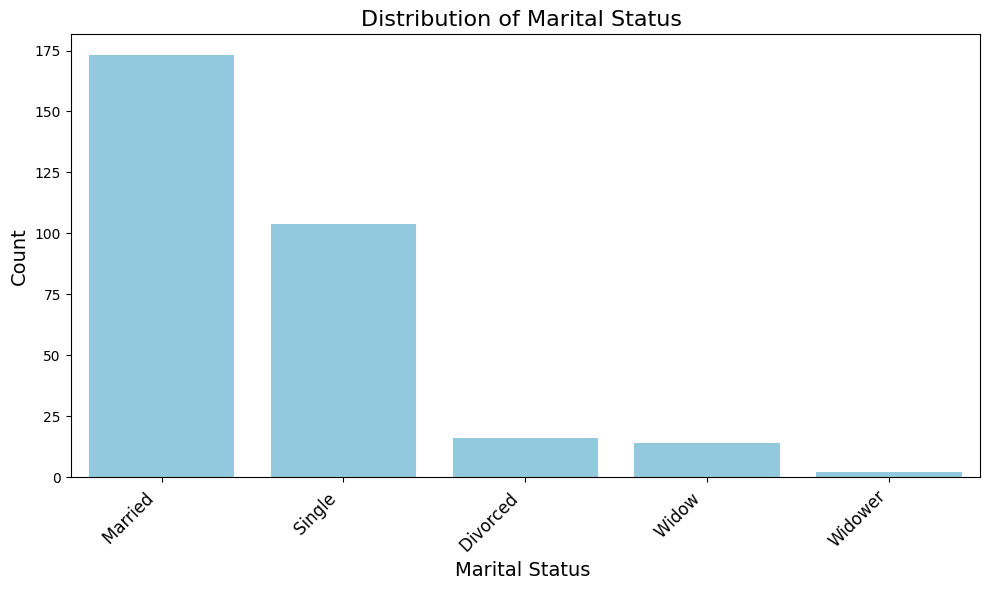

In [ ]:
plot_categorical_barchart(df,df.columns[4])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_categorical_percentage_barchart(
    df, column, title=None, xlabel=None, ylabel='Percentage',
    figsize=(10, 6), hatch_patterns=None
):
    """
    Plots a percentage distribution bar chart for a categorical column
    from a Pandas DataFrame with hatching for readability.

    Parameters:
    - df: pandas.DataFrame
        The DataFrame containing the data.
    - column: str
        The name of the categorical column to plot.
    - title: str, optional
        The title of the plot. Defaults to None.
    - xlabel: str, optional
        The label for the x-axis. Defaults to the column name.
    - ylabel: str, optional
        The label for the y-axis. Defaults to 'Percentage'.
    - figsize: tuple, optional
        The size of the figure. Defaults to (10, 6).
    - hatch_patterns: list, optional
        A list of hatching patterns for the bars. Defaults to None.

    Returns:
    - None
    """
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in the DataFrame.")

    # Calculate percentage distributions
    category_counts = df[column].value_counts(normalize=True) * 100
    categories = category_counts.index
    percentages = category_counts.values

    # Set up hatching patterns if not provided
    if hatch_patterns is None:
        hatch_patterns = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']

    # Create the bar chart
    fig, ax = plt.subplots(figsize=figsize)
    bars = ax.bar(categories, percentages, color='gray', edgecolor='black', hatch=hatch_patterns[:len(categories)])

    # Add percentage labels on each bar
    for bar, percentage in zip(bars, percentages):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, height,
            f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12
        )

    # Add labels and title
    ax.set_title(title if title else f"Percentage Distribution of {column}", fontsize=16)
    ax.set_xlabel(xlabel if xlabel else column, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_xticks(np.arange(len(categories)))
    ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=12)

    # Adjust layout
    plt.tight_layout()
    save_path = f'/content/drive/MyDrive/Danny Analysis/Results/{column}_barchart.png'
    plt.savefig(save_path)
    plt.show()


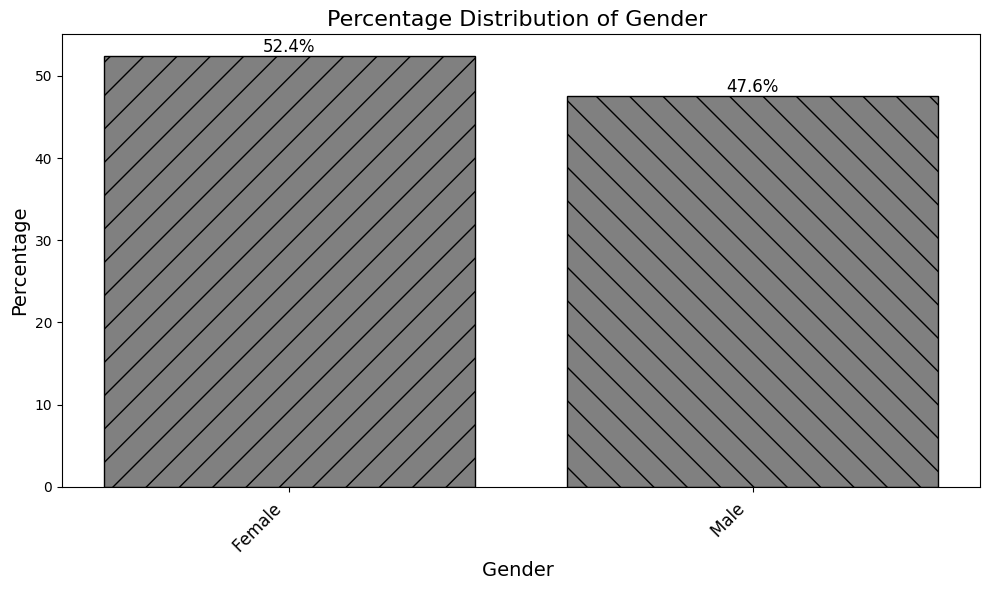

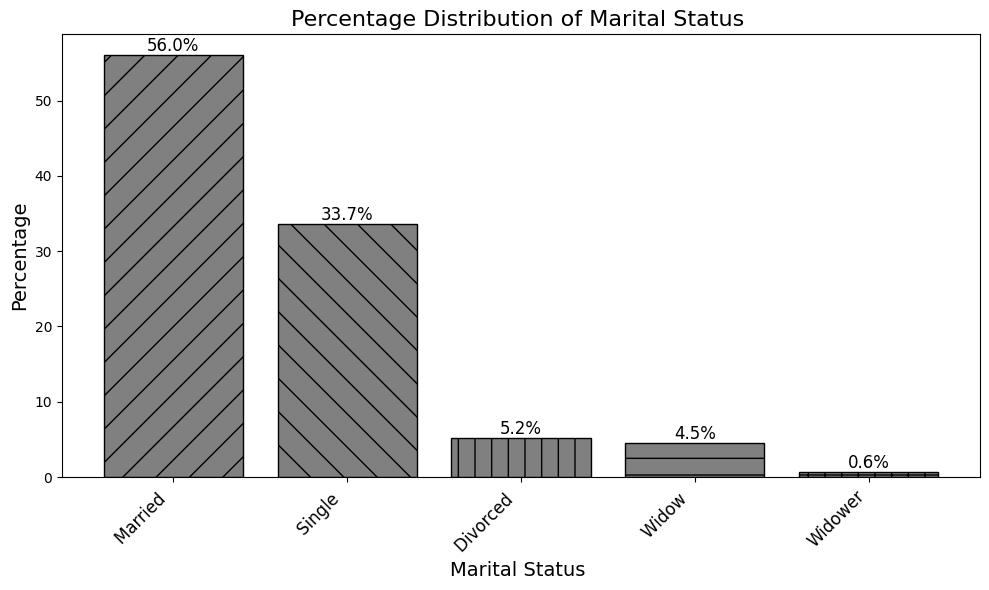

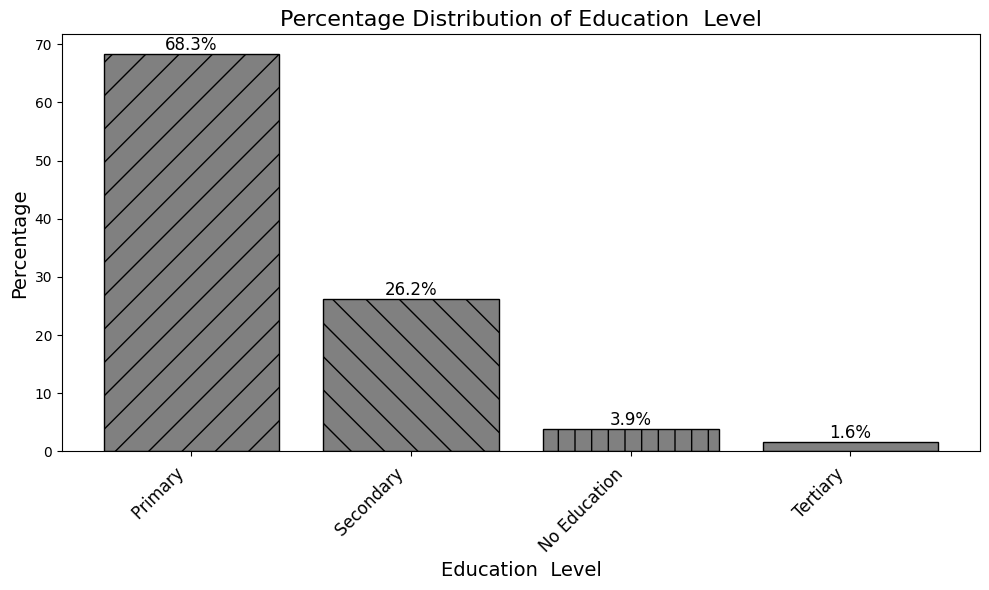

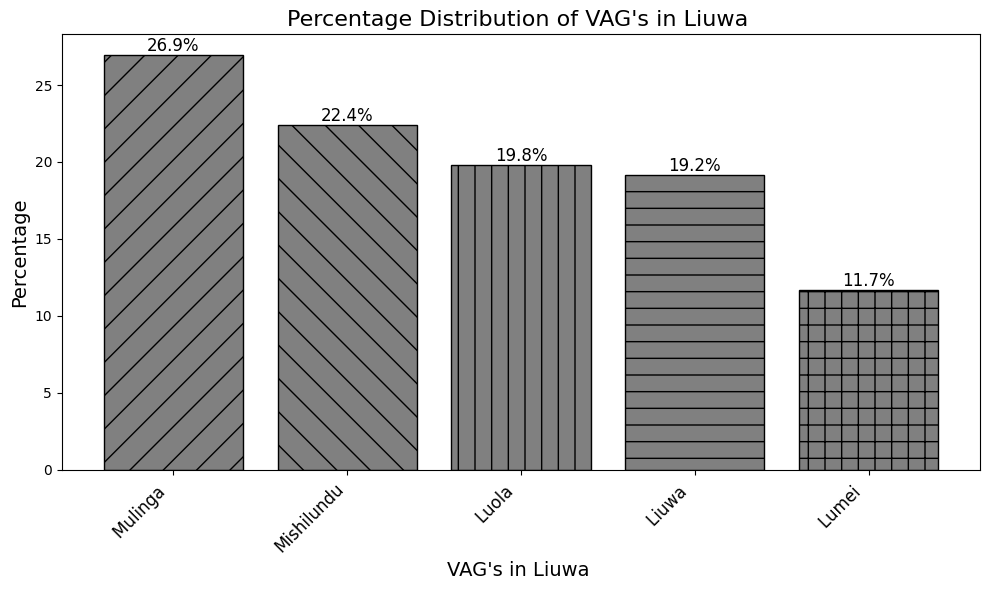

In [ ]:
column_index = [3,4,5,8]
for i in column_index:
  plot_categorical_percentage_barchart(df,df.columns[i])
#plot_categorical_percentage_barchart(df,df.columns[3])

In [ ]:
#df.info()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def summarize_categorical(
    df, column, top_n=10, threshold_percentage=2, figsize=(12, 6), hatch_patterns=None
):
    """
    Summarizes a categorical variable by grouping less frequent categories as 'Others',
    and provides a visualization with hatching patterns and percentage labels.

    Parameters:
    - df: pandas.DataFrame
        The DataFrame containing the data.
    - column: str
        The name of the categorical column to summarize.
    - top_n: int, optional
        Number of top categories to display. Defaults to 10.
    - threshold_percentage: float, optional
        Minimum percentage threshold for a category to be shown individually.
        Others are grouped. Defaults to 2%.
    - figsize: tuple, optional
        Size of the plot figure. Defaults to (12, 6).
    - hatch_patterns: list, optional
        A list of hatching patterns for the bars. Defaults to None.

    Returns:
    - summary_table: pandas.DataFrame
        A summary table with categories, counts, and percentages.
    """
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in the DataFrame.")

    # Calculate counts and percentages
    category_counts = df[column].value_counts()
    total = category_counts.sum()
    category_percentages = (category_counts / total) * 100
    cumulative_percentages = category_percentages.cumsum()

    # Create a summary DataFrame
    summary_df = pd.DataFrame({
        'Category': category_counts.index,
        'Count': category_counts.values,
        'Percentage': category_percentages.values,
        'Cumulative Percentage': cumulative_percentages.values
    })

    # Group less frequent categories into "Others"
    others_df = summary_df[summary_df['Percentage'] < threshold_percentage]
    others_row = pd.DataFrame({
        'Category': ['Others'],
        'Count': [others_df['Count'].sum()],
        'Percentage': [others_df['Percentage'].sum()],
        'Cumulative Percentage': [100.0]  # "Others" encompasses the remaining percentage
    })
    summary_df = summary_df[summary_df['Percentage'] >= threshold_percentage]
    summary_df = pd.concat([summary_df, others_row], ignore_index=True)

    # Sort by count and limit to top_n categories
    summary_df = summary_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
    if len(summary_df) > top_n:
        others_row = summary_df[summary_df['Category'] == 'Others']
        summary_df = pd.concat([summary_df.iloc[:top_n - 1], others_row], ignore_index=True)

    # Reset hatch patterns for the final summary_df
    if hatch_patterns is None:
        hatch_patterns = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
    hatch_patterns = hatch_patterns[:len(summary_df)]

    # Plotting
    plt.figure(figsize=figsize)
    bars = plt.barh(
        summary_df['Category'], summary_df['Percentage'],
        color='gray', edgecolor='black', hatch=[hatch_patterns[i] for i in range(len(summary_df))]
    )
    plt.xlabel('Percentage', fontsize=12)
    plt.ylabel('Category', fontsize=12)
    plt.title(f'Distribution of {column} (Top {top_n-1} Categories + Others)', fontsize=14)

    # Add percentage labels
    for bar, percentage in zip(bars, summary_df['Percentage']):
        plt.text(
            bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
            f'{percentage:.1f}%', va='center', fontsize=10
        )

    # Invert y-axis for readability
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    # Return summary table
    return summary_df




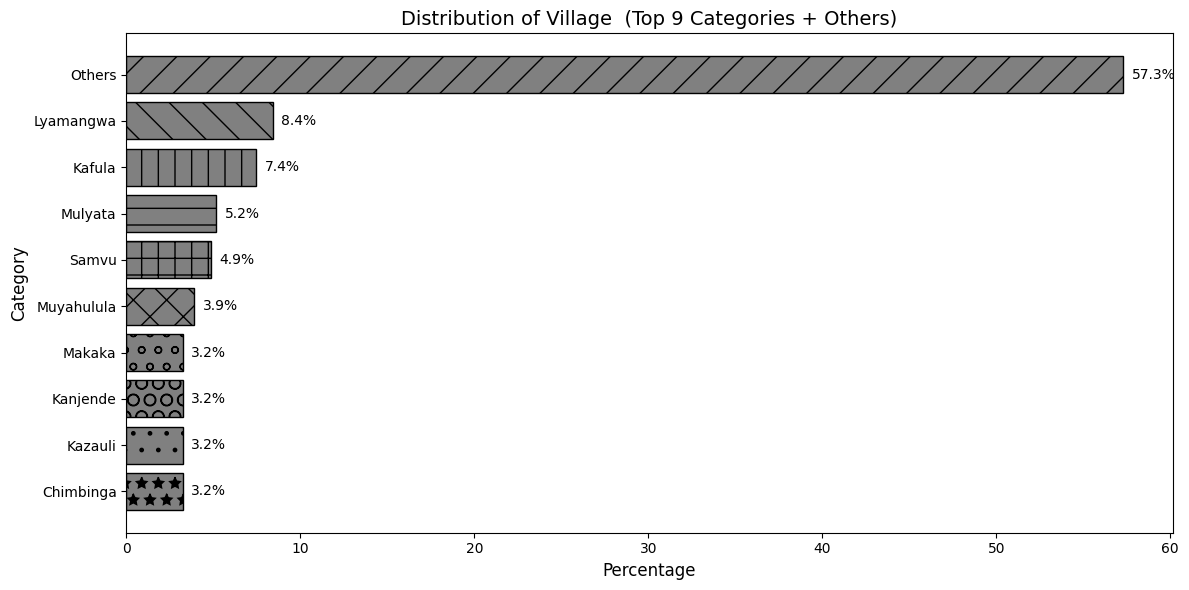

     Category  Count  Percentage  Cumulative Percentage
0      Others    177   57.281553             100.000000
1   Lyamangwa     26    8.414239               8.414239
2      Kafula     23    7.443366              15.857605
3     Mulyata     16    5.177994              21.035599
4       Samvu     15    4.854369              25.889968
5  Muyahulula     12    3.883495              29.773463
6      Makaka     10    3.236246              33.009709
7    Kanjende     10    3.236246              36.245955
8     Kazauli     10    3.236246              39.482201
9   Chimbinga     10    3.236246              42.718447


In [ ]:
summary_table = summarize_categorical( df, column= df.columns[9], top_n=10, threshold_percentage=3)
print(summary_table)

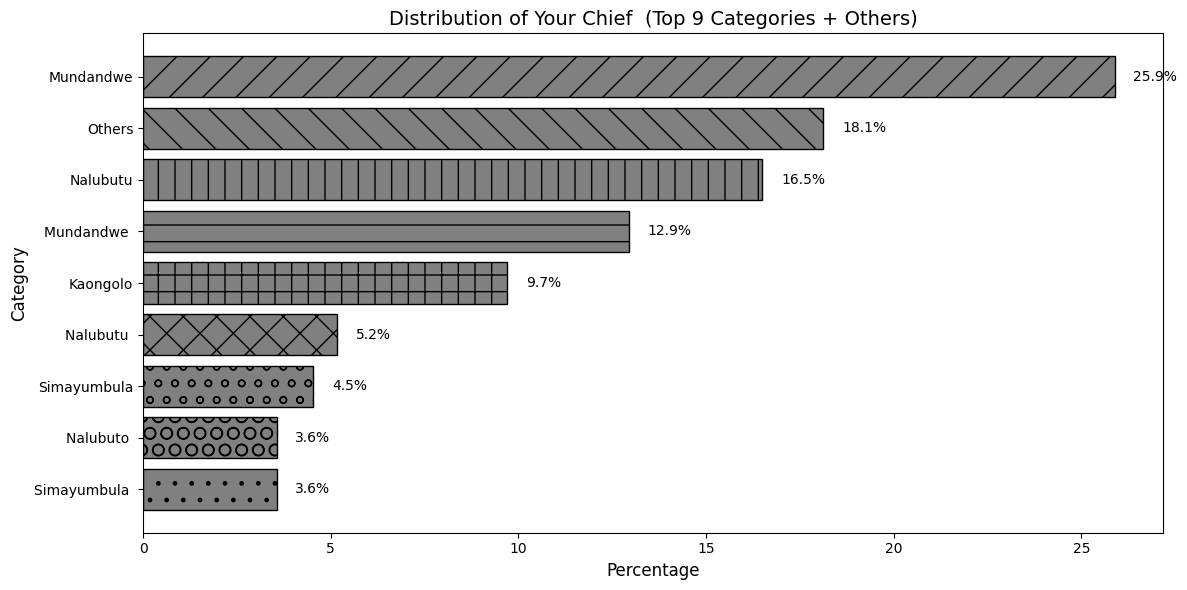

       Category  Count  Percentage  Cumulative Percentage
0     Mundandwe     80   25.889968              25.889968
1        Others     56   18.122977             100.000000
2      Nalubutu     51   16.504854              42.394822
3    Mundandwe      40   12.944984              55.339806
4      Kaongolo     30    9.708738              65.048544
5     Nalubutu      16    5.177994              70.226537
6   Simayumbula     14    4.530744              74.757282
7     Nalubuto      11    3.559871              78.317152
8  Simayumbula      11    3.559871              81.877023


In [ ]:
summary_table = summarize_categorical( df, column= df.columns[10], top_n=10, threshold_percentage=3)
print(summary_table)

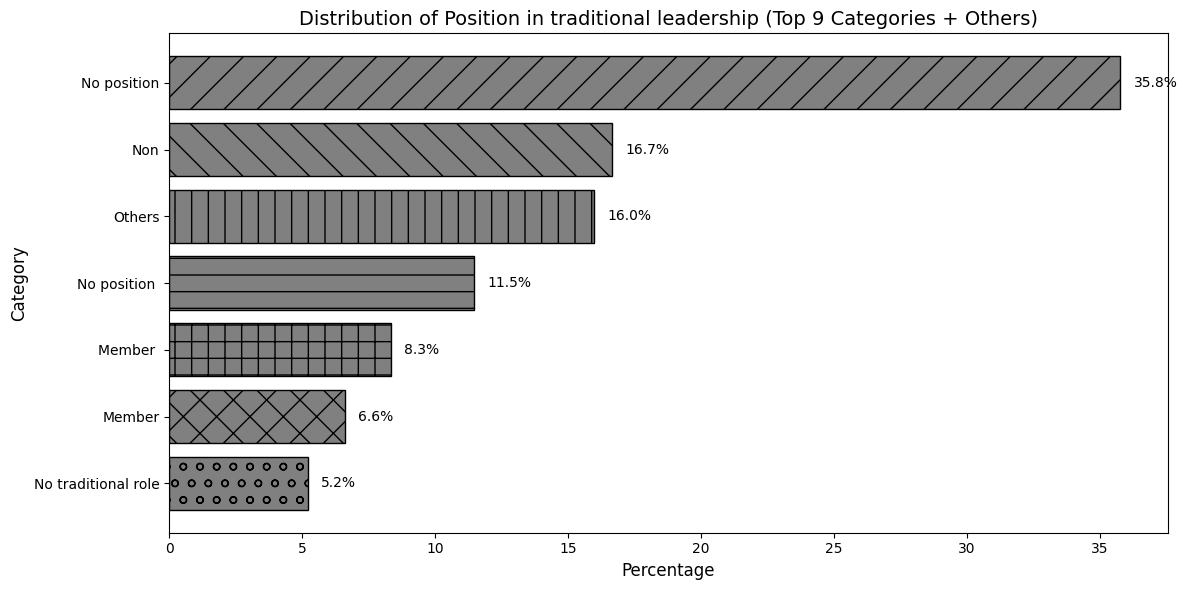

              Category  Count  Percentage  Cumulative Percentage
0          No position    103   35.763889              35.763889
1                  Non     48   16.666667              52.430556
2               Others     46   15.972222             100.000000
3         No position      33   11.458333              63.888889
4              Member      24    8.333333              72.222222
5               Member     19    6.597222              78.819444
6  No traditional role     15    5.208333              84.027778


In [ ]:
summary_table = summarize_categorical( df, column= df.columns[17], top_n=10, threshold_percentage=3)
print(summary_table)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 91 columns):
 #   Column                                                                                                                                                                              Non-Null Count  Dtype         
---  ------                                                                                                                                                                              --------------  -----         
 0   start                                                                                                                                                                               310 non-null    datetime64[ns]
 1   end                                                                                                                                                                                 310 non-null    datetime64[ns]
 2   1. What is your name?     

In [ ]:
# prompt: print unique elements in a  given column

# Assuming 'df' is your DataFrame (as defined in your provided code)
def print_unique_elements_in_column(df, column_name):
    """Prints the unique elements in the specified column of a DataFrame."""
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    unique_elements = df[column_name].unique()
    print(f"Unique elements in column '{column_name}':")
    for element in unique_elements:
        print(element)

# Example usage (replace 'your_column_name' with the actual column name):
# Assuming you want to see unique values in the fifth column (index 4)
print_unique_elements_in_column(df, df.columns[10])

Unique elements in column 'Your Chief ':
Chief Kakuya
Chief Kaongolo
Kaongolo
Kaongolo 
KAONGOLO
nan
Nalubutu
Nalubutu 
Nalubuto
Nalubuto 
Mundandwe
Mundandwe 
Akabati
NALUBUTU
Simayumbula
SIMAYUMBULA
Simayumbula 
Mayamba
Simaimbula 
Simaimbula
Simayumbu
Simaumbula
Simaumbula 
Mayamba 
MUNDANDWE
Namangwa
Shimayumbula
Shimayumbula 
 Mundandwe 
